In [22]:
from google.colab import drive

PATH = "/content/drive/MyDrive/MSc /Narratives Project Nadav/analysis/data/raw"
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import os
import pandas as pd
import numpy as np

data_path = os.path.join(PATH, "storeleads-scraping-about_data_toclean.dta")
#df = pd.read_csv(data_path)
df = pd.read_stata(data_path)



# add empty row called clean text
df['clean_text'] = ''
df.dropna(inplace=True)
df['text'] = df['text'].apply(str.strip)

print(len(df))

display(df.head())


636812


,url,url_about,country_code,language,server,text,images_count,keep,length,clean_text
0,homegoodsboutique.com,homegoodsboutique.com/pages/about-us,US,en,shopify,About Us Buy More/Save More Sale - Up to 30% O...,2,No dup,206,
1,flexam.fr,flexam.fr/pages/about-flex-am-is-a-company,US,en,shopify,About FLEX AM is a company Have an account? Lo...,3,No dup,206,
2,hevenlyhomegoods.com,hevenlyhomegoods.com/pages/about-us,US,en,shopify,About Us Buy More/Save More Sale - Up to 30% O...,2,No dup,206,
3,fruitsfordrinks.com,fruitsfordrinks.com/pages/about,US,en,shopify,"Why Fruits for Drinks? Consistent, Efficient a...",0,No dup,206,
4,landecandleco.com,landecandleco.com/pages/about-us,US,en,shopify,About Us Hand Poured with love for Pets! 🐾 Use...,0,No dup,206,


In [46]:
# save first few rows as csv
df.head(20).to_csv( "sample.csv", index=False)

# Conceptual Construct Representations

## installation

In [10]:
!pip install pyccr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
!pip install condacolab
import condacolab
condacolab.install()


  Using cached condacolab-0.1.10-py3-none-any.whl.metadata (5.5 kB)
Using cached condacolab-0.1.10-py3-none-any.whl (7.2 kB)
✨🍰✨ Everything looks OK!


In [15]:
!conda create --name ccr python==3.9 -q



Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/ccr

  added / updated specs:
    - python==3.9


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  ca-certificates    conda-forge/linux-64::ca-certificates-2025.1.31-hbcca054_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.43-h712a8e2_4 
  libffi             conda-forge/linux-64::libffi-3.3-h58526e2_2 
  libgcc             conda-forge/linux-64::libgcc-14.2.0-h767d61c_2 
  libgcc-ng          conda-forge/linux-64::libgcc-ng-14.2.0-h69a702a_2 
  libgomp            conda-forge/linux-64::libgomp-14.2.0-h767d61c_2 
  liblzma            conda-forge/linux-64::liblzma-5.6.4-hb9d3cd8_0 
  liblzma-devel      conda-forge/linux-64::liblzma-devel-5.6.4-hb9d3cd8_0 
  libsqlite          conda-forge/linu

In [16]:
!conda init
!conda activate ccr


no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.

CondaError: Run 'conda init' before 'conda activate'



In [51]:
from utils import ccr_wrapper

ccr_result_dataframe = ccr_wrapper(data_file='sample.csv',
                                       data_col='text',
                                       q_file='values_questionnaire.csv',
                                       q_col = 'question')

In [53]:
display(ccr_result_dataframe.head(10))

,url,url_about,country_code,language,server,text,images_count,keep,length,clean_text,...,sim_item_3,sim_item_4,sim_item_5,sim_item_6,sim_item_7,sim_item_8,sim_item_9,sim_item_10,sim_item_11,sim_item_12
0,homegoodsboutique.com,homegoodsboutique.com/pages/about-us,US,en,shopify,About Us Buy More/Save More Sale - Up to 30% O...,2,No dup,206,NaN,...,0.162968,0.109701,0.126353,0.038858,0.142998,0.118831,0.126800,0.063245,0.062530,0.037169
1,flexam.fr,flexam.fr/pages/about-flex-am-is-a-company,US,en,shopify,About FLEX AM is a company Have an account? Lo...,3,No dup,206,NaN,...,0.038364,0.003971,-0.071595,0.059467,0.018814,0.022986,-0.012514,0.002794,0.012431,0.005986
2,hevenlyhomegoods.com,hevenlyhomegoods.com/pages/about-us,US,en,shopify,About Us Buy More/Save More Sale - Up to 30% O...,2,No dup,206,NaN,...,0.162968,0.109701,0.126353,0.038858,0.142998,0.118831,0.126800,0.063245,0.062530,0.037169
3,fruitsfordrinks.com,fruitsfordrinks.com/pages/about,US,en,shopify,"Why Fruits for Drinks? Consistent, Efficient a...",0,No dup,206,NaN,...,0.041624,0.020116,0.151756,0.024752,0.125471,0.071774,0.011093,0.149030,0.100687,0.047162
4,landecandleco.com,landecandleco.com/pages/about-us,US,en,shopify,About Us Hand Poured with love for Pets! 🐾 Use...,0,No dup,206,NaN,...,0.121780,0.119138,0.033075,0.067012,0.177267,0.124440,0.121004,0.112576,0.136438,0.051910
5,grandlinegoods.com,grandlinegoods.com/pages/about-us,US,en,shopify,About Us Oi! Welcome abord to Grand Line Goods...,3,No dup,206,NaN,...,0.180553,0.116696,-0.000493,0.091262,0.120358,0.066764,0.057062,0.028595,0.182669,-0.018965
6,apparelksset.com,apparelksset.com/pages/about-us,US,en,shopify,"About Us Welcome to our storeAt ApparelKsset, ...",0,No dup,206,NaN,...,0.173310,0.124940,0.071814,0.196129,0.158224,0.080129,0.129768,0.109384,0.131710,0.100276
7,handcraftedbybel.com.au,handcraftedbybel.com.au/pages/about-us,GB,en,shopify,About Us Free standard delivery 📦 on orders ov...,1,No dup,206,NaN,...,0.053558,-0.022718,0.063162,0.086866,0.082694,0.048803,0.105103,0.044692,0.023716,0.101270
8,sweetcbdfrance.com,sweetcbdfrance.com/pages/faq,FR,fr,shopify,FAQ Tous nos produits sont 100 % légaux et res...,0,No dup,206,NaN,...,-0.049075,0.002273,0.027546,0.011109,-0.058482,-0.049197,-0.037725,-0.046796,-0.079705,-0.002870
9,homebestonlinestore.com,homebestonlinestore.com/pages/about-us-1,US,en,shopify,ABOUT US Buy More/Save More Sale - Up to 30% O...,2,No dup,206,NaN,...,0.162968,0.109701,0.126353,0.038858,0.142998,0.118831,0.126800,0.063245,0.062530,0.037169


In [54]:
# Load the questionnaire to map each question_id to a dimension
q_df = pd.read_csv("values_questionnaire.csv")  # columns: question_id, dimension, question

# Build a dict: question_id -> dimension
dimension_map = dict(zip(q_df["question_id"], q_df["dimension"]))

def compute_dimension_scores(ccr_df, dimension_map):
    from collections import defaultdict
    dim2ids = defaultdict(list)

    # Invert: dimension -> list of question IDs
    for q_id, dim_name in dimension_map.items():
        dim2ids[dim_name].append(q_id)

    # For each dimension, average the relevant sim_item_* columns
    for dim_name, q_ids in dim2ids.items():
        sim_cols = [f"sim_item_{qid}" for qid in q_ids if f"sim_item_{qid}" in ccr_df.columns]
        if not sim_cols:
            continue
        ccr_df[f"{dim_name}_score"] = ccr_df[sim_cols].mean(axis=1)

    return ccr_df

ccr_result_dataframe = compute_dimension_scores(ccr_result_dataframe, dimension_map)
display(ccr_result_dataframe.head())


,url,url_about,country_code,language,server,text,images_count,keep,length,clean_text,...,sim_item_6,sim_item_7,sim_item_8,sim_item_9,sim_item_10,sim_item_11,sim_item_12,Individualism_score,Collectivism_score,Altruism_score
0,homegoodsboutique.com,homegoodsboutique.com/pages/about-us,US,en,shopify,About Us Buy More/Save More Sale - Up to 30% O...,2,No dup,206,NaN,...,0.038858,0.142998,0.118831,0.126800,0.063245,0.062530,0.037169,0.074680,0.111194,0.110508
1,flexam.fr,flexam.fr/pages/about-flex-am-is-a-company,US,en,shopify,About FLEX AM is a company Have an account? Lo...,3,No dup,206,NaN,...,0.059467,0.018814,0.022986,-0.012514,0.002794,0.012431,0.005986,0.024378,-0.013333,0.005675
2,hevenlyhomegoods.com,hevenlyhomegoods.com/pages/about-us,US,en,shopify,About Us Buy More/Save More Sale - Up to 30% O...,2,No dup,206,NaN,...,0.038858,0.142998,0.118831,0.126800,0.063245,0.062530,0.037169,0.074680,0.111194,0.110508
3,fruitsfordrinks.com,fruitsfordrinks.com/pages/about,US,en,shopify,"Why Fruits for Drinks? Consistent, Efficient a...",0,No dup,206,NaN,...,0.024752,0.125471,0.071774,0.011093,0.149030,0.100687,0.047162,0.061878,0.094283,0.064342
4,landecandleco.com,landecandleco.com/pages/about-us,US,en,shopify,About Us Hand Poured with love for Pets! 🐾 Use...,0,No dup,206,NaN,...,0.067012,0.177267,0.124440,0.121004,0.112576,0.136438,0.051910,0.104619,0.078938,0.138462


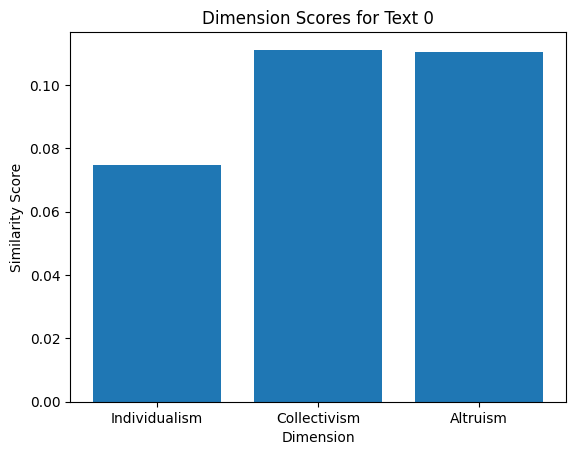

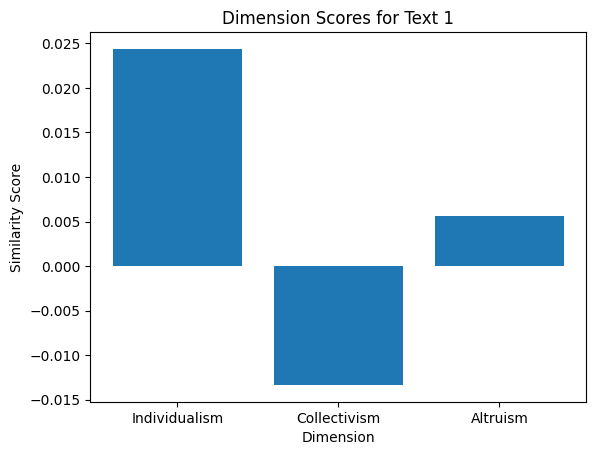

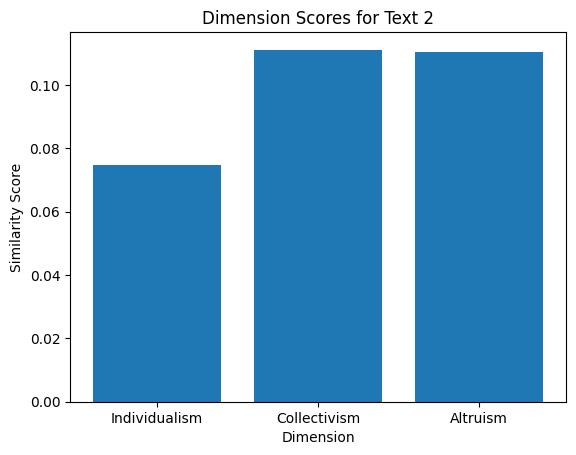

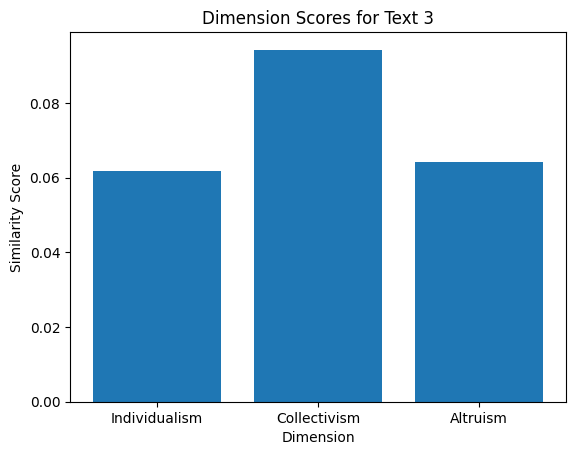

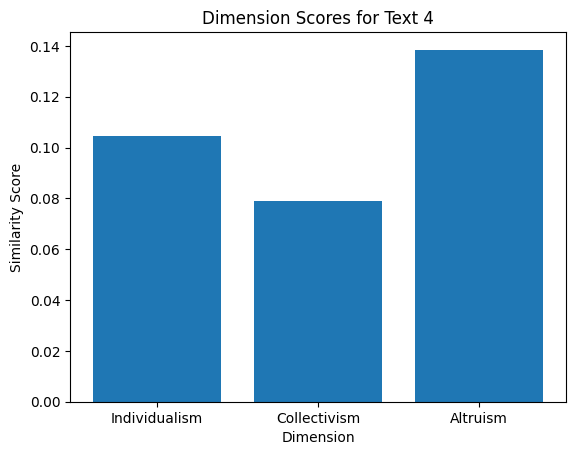

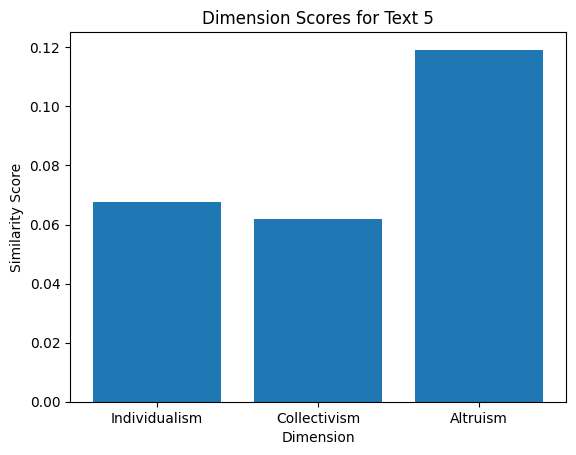

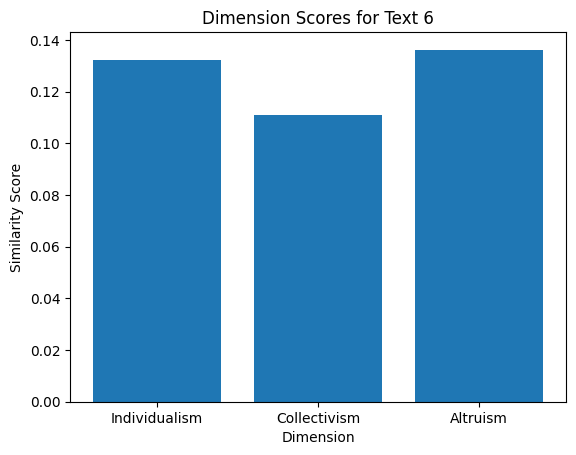

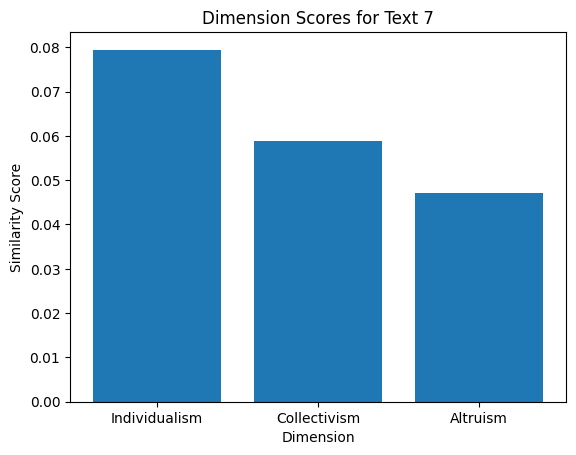

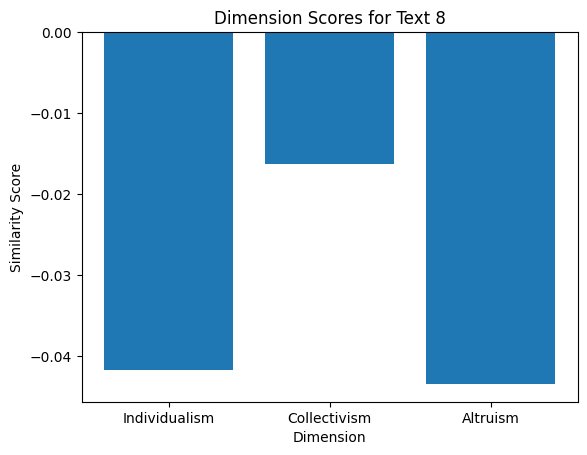

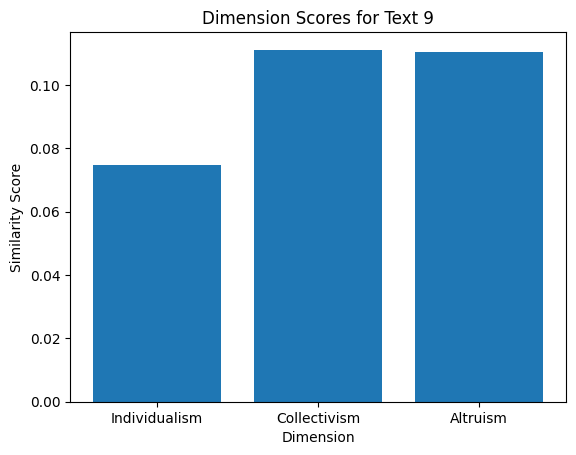

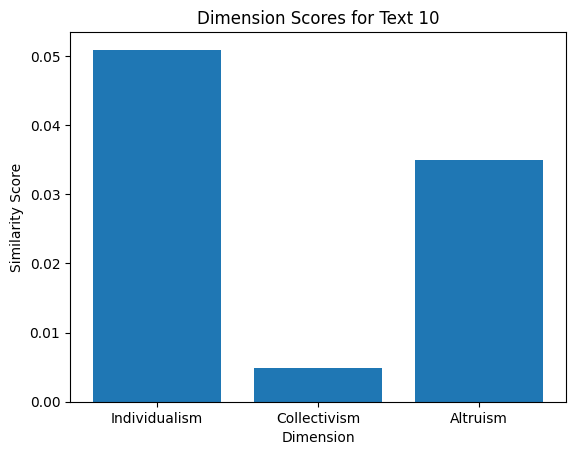

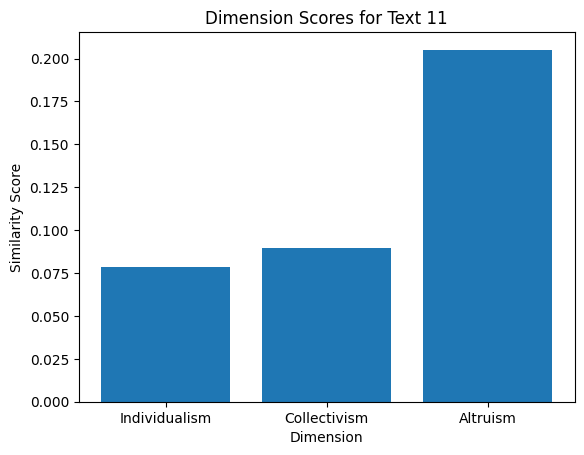

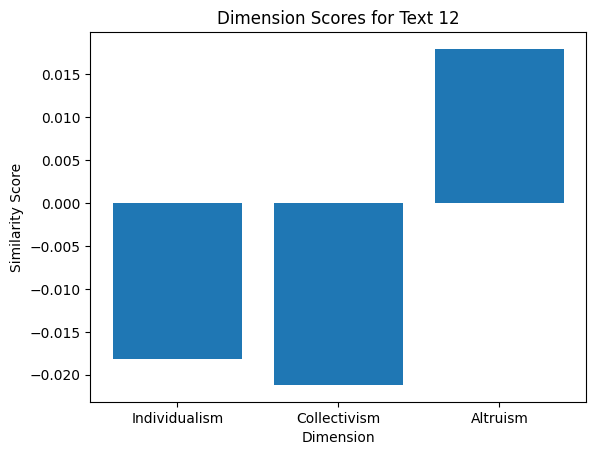

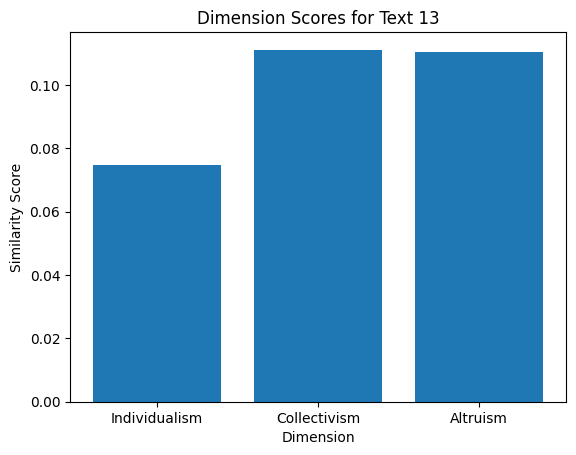

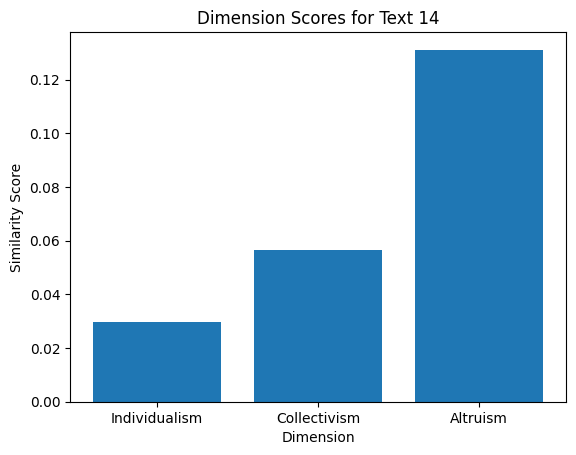

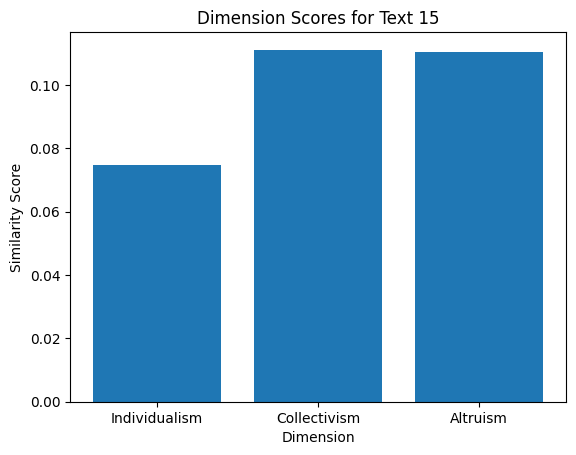

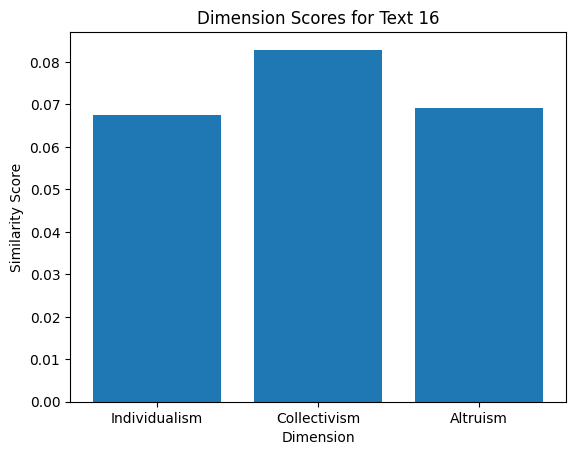

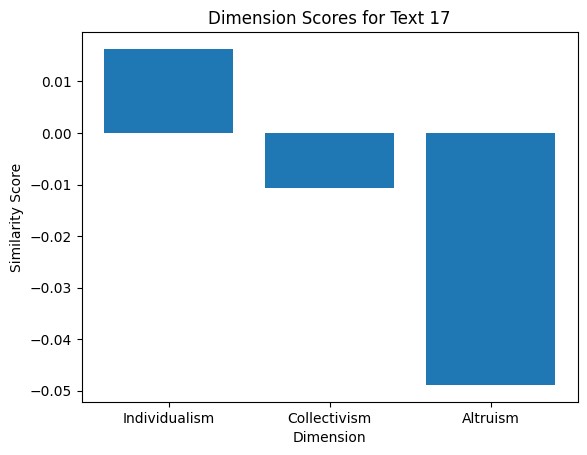

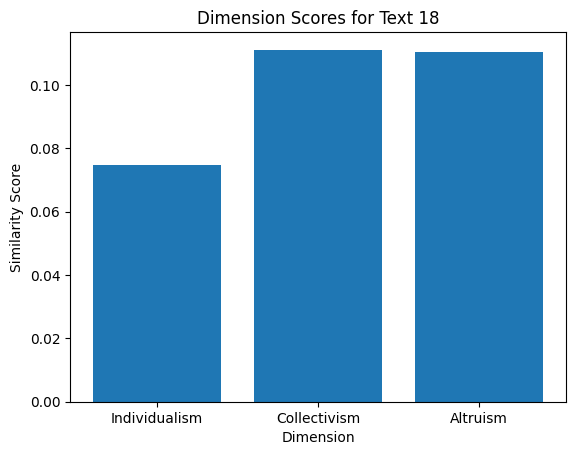

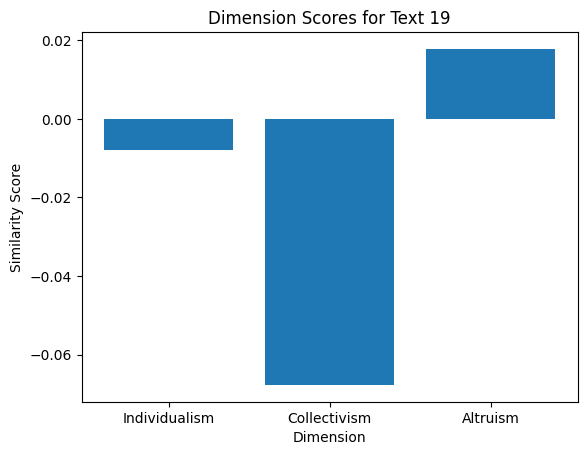

In [56]:
import matplotlib.pyplot as plt

# Suppose your CCR result DataFrame is named ccr_result_df
# and you’ve already computed dimension columns like "Individualism_score", "Collectivism_score", etc.
dimension_cols = [col for col in ccr_result_dataframe.columns if col.endswith("_score")]

# (Optional) If you have a lot of rows, you may limit to the first N
N = 5  # or 10, or however many you want to visualize
limited_df = ccr_result_dataframe

for i in range(len(limited_df)):
    # Extract the row
    row = limited_df.iloc[i]
    # Grab only the dimension scores for this row
    dimension_scores = row[dimension_cols]

    # Get dimension names without "_score" suffix
    dimension_names = [dim_col.replace("_score", "") for dim_col in dimension_cols]

    # Create a new figure for this text
    plt.figure()
    # Bar chart: x = dimension names, y = the row’s scores
    plt.bar(x=dimension_names, height=dimension_scores)

    # (Optional) If there's a specific ID or text snippet you'd like to show in the title, you can do:
    text_id = row.get("id", i)  # if you have an 'id' column, else just use i
    plt.title(f"Dimension Scores for Text {text_id}")
    plt.xlabel("Dimension")
    plt.ylabel("Similarity Score")

    plt.show()

In [66]:
# print the 1 index text
print(ccr_result_dataframe.iloc[18]['text'])

About Us Buy More/Save More Sale - Up to 30% Off*Be the first to know about new collections and exclusive offers.We make interiors infused with the spirit of contemporary design and minimalist philosophies.


In [67]:
def plot_radar_chart(scores, labels, title="Radar Chart"):
    """
    scores: list or array of dimension scores (e.g. [0.3, 0.7, 0.5])
    labels: list of dimension names (e.g. ["Individualism", "Collectivism", "Altruism"])
    title: chart title
    """
    # Number of dimensions
    num_vars = len(labels)

    # Angles around the circle
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # Close the polygon by repeating the first angle/scores
    angles = np.concatenate((angles, [angles[0]]))
    scores = np.concatenate((scores, [scores[0]]))

    # Create a single polar plot
    fig = plt.figure()
    ax = fig.add_subplot(projection="polar")

    # Plot data
    ax.plot(angles, scores, marker='o')
    ax.fill(angles, scores, alpha=0.25)  # fill the area

    # Set the angular ticks to the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Optionally adjust the radial limits or labels
    # ax.set_ylim(0, 1)  # if your scores are between 0 and 1

    ax.set_title(title)
    plt.show()


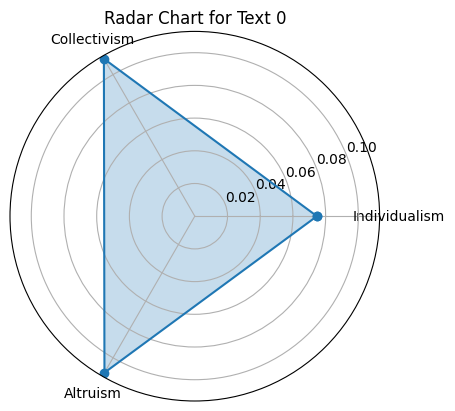

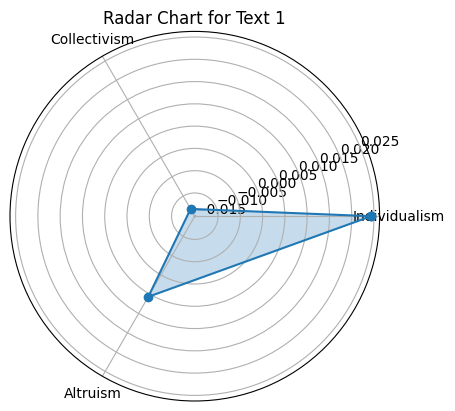

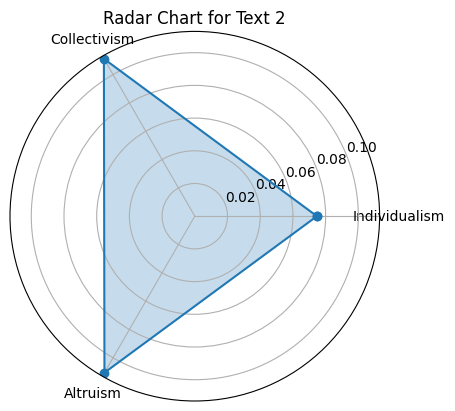

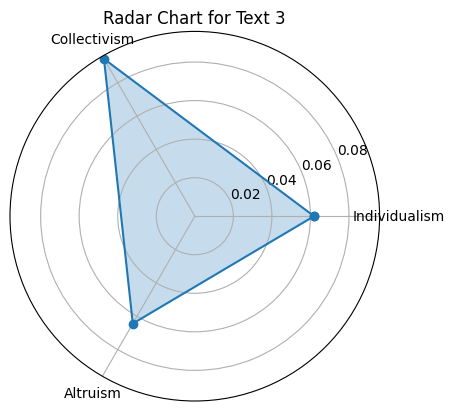

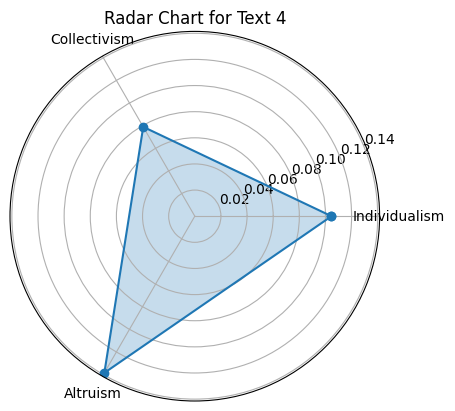

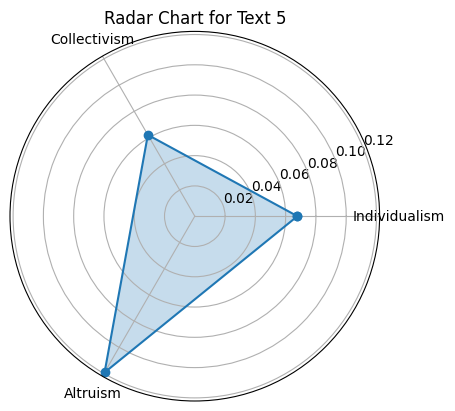

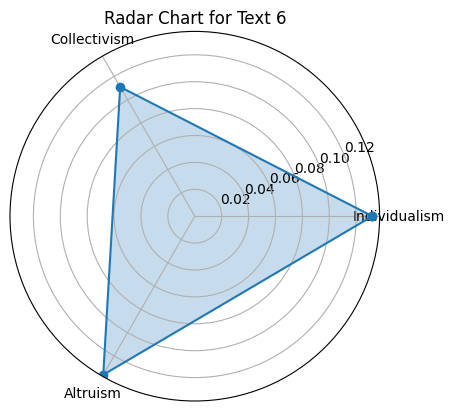

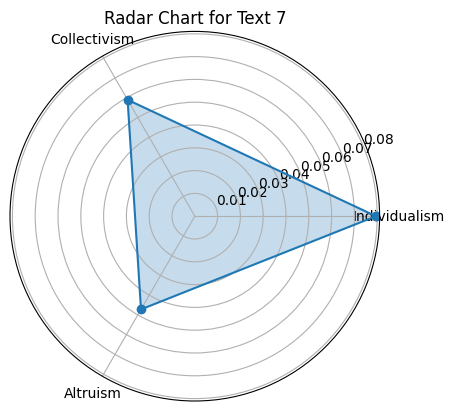

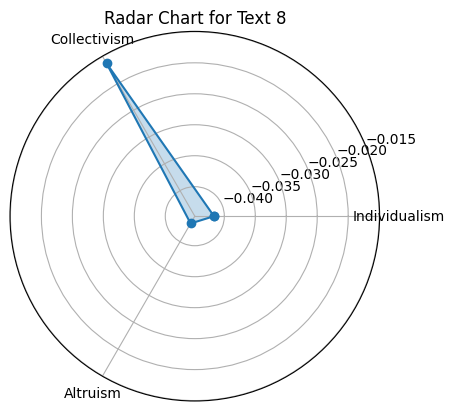

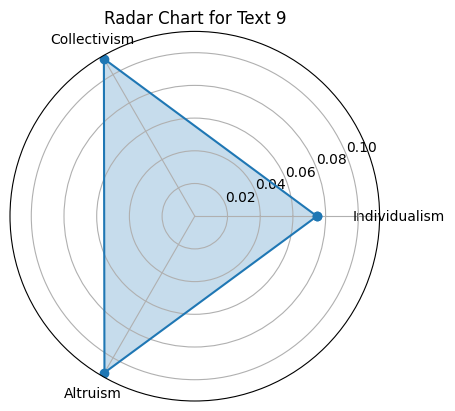

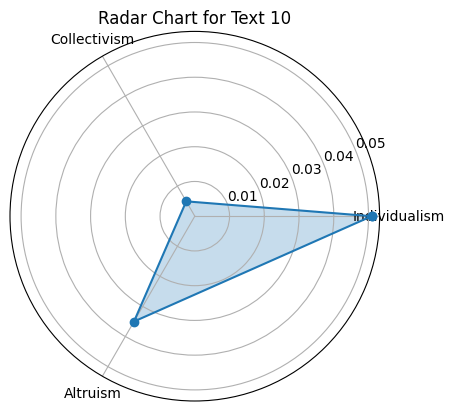

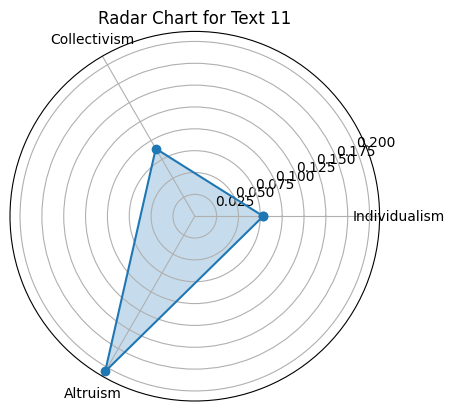

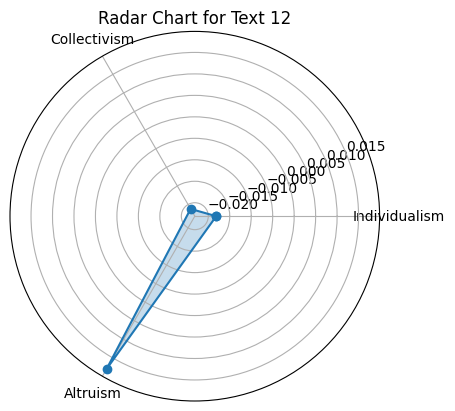

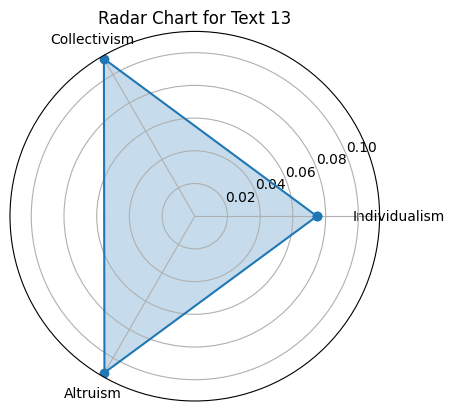

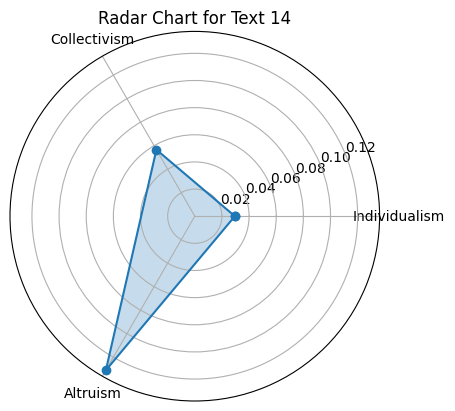

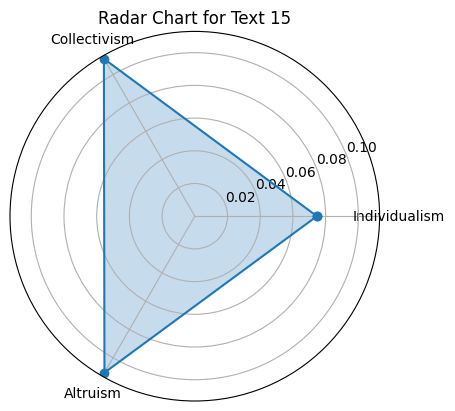

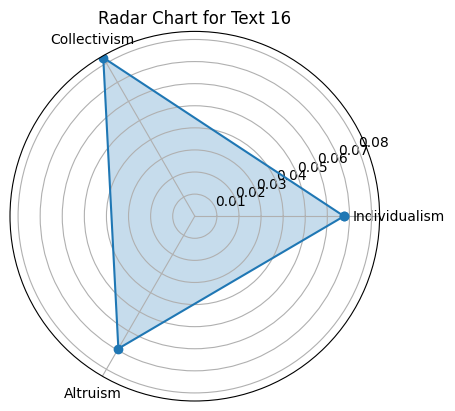

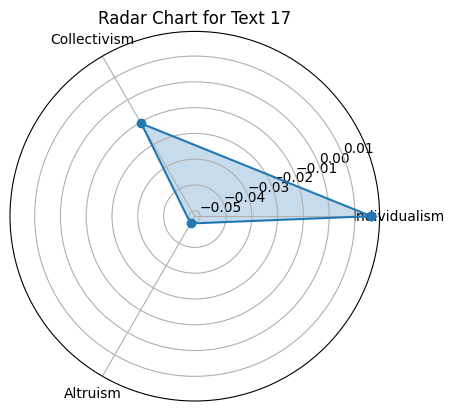

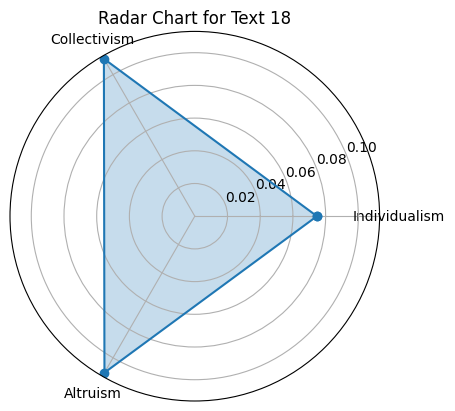

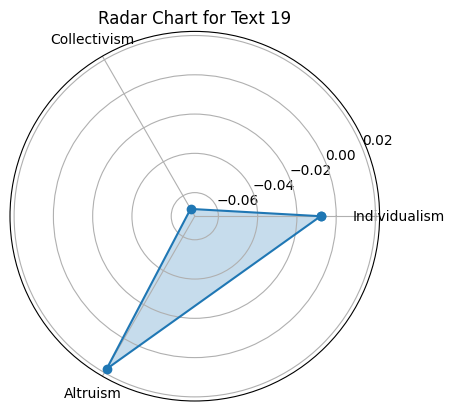

In [68]:
for i in range(len(limited_df)):
    row = limited_df.iloc[i]

    # Extract just the dimension scores in the same order as dimension_cols
    scores = row[dimension_cols].values.astype(float)

    # Make labels by removing the "_score" suffix
    labels = [col.replace("_score", "") for col in dimension_cols]

    # Optional: if there's an "id" column or some other identifier, use it for the title
    text_id = row.get("id", i)  # fallback to row index if "id" doesn't exist

    plot_radar_chart(
        scores=scores,
        labels=labels,
        title=f"Radar Chart for Text {text_id}"
    )
